# Data sources

## US_Accidents_Dec19
https://www.kaggle.com/sobhanmoosavi/us-accidents

## 2013_driverslicence
https://www.bts.gov/content/licensed-drivers

## Populations statistics
https://www.census.gov/

# Table of content

## Part 1 : [Import libraries and Data, personnal functions](#Part1)
## Part 2 : [Data analysis](#Part2)
### [Computation of the size of the differents dataset](#Part2)
### [Quick look at the Accident data](#Part2-1)
### [Data visualization](#Part2-2)
### [Conclusion](#Part2-c)
## Part 3 : [Data processing](#Part3)

# My OS
For this work I used a computer with :
    * Windows 7
    * Intel(R) Core(TM) i5-2500K CPU @ 3.30GHz
    * 16 Go RAM (4 x 4 Go)
    * NVIDIA GeForce GTX 1050 Ti

<a id="Part1"></a>
# Part 1 : Import libraries and Data, personnal functions
## Import librairies

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

## Personnal fonctions

In [2]:
def fahrenheitToCelsius(temp):
    '''
    Description : convert temperature from fahrenheit​ to celsius
    input: temp : temperature in fahrenheit
    output: temperature in celsius
    '''
    try :
        tempCel = (temp - 32) * 5/9
        return tempCel
    except ValueError:
        print("It's not a value.")

## Data import

In [3]:
# source : Kaggle / https://www.census.gov/ 
# import the car accidents data
df_data = pd.read_csv("Data/US_Accidents_Dec19.csv")
# import the population data
df_pop = pd.read_csv("Data/USA_pop2010-2019.csv", sep=";")
# import the code/state data
df_code = pd.read_csv("Data/USA_Code_State.csv", sep=";")
# import pop by age data
df_popage = pd.read_csv("Data/USA_pop_age_2010-2019.csv", sep=";")
# import driver's licence data
df_drivers = pd.read_excel("Data/2013_driverslicence.xlsx")

<a id="Part2"></a>
# Part 2 : Data analysis
## Computation of the size of the differents dataset

In [4]:
print("Size of the Accidents dataset is :" + str(df_data.shape))
print("Size of the Population dataset is :" + str(df_pop.shape))
print("Size of the Code to State dataset is :" + str(df_code.shape))
print("Size of the populaton by age dataset is :" + str(df_popage.shape))
print("Size of the number of driver's licence dataset is :" + str(df_drivers.shape))

Size of the Accidents dataset is :(2974335, 49)
Size of the Population dataset is :(57, 67)
Size of the Code to State dataset is :(51, 3)
Size of the populaton by age dataset is :(63, 4)
Size of the number of driver's licence dataset is :(52, 7)


<a id="Part2-1"></a>
## Quick look at the Accident data
The 5 first rows

In [5]:
df_data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


<a id="Part2-2"></a>
## Data visualization

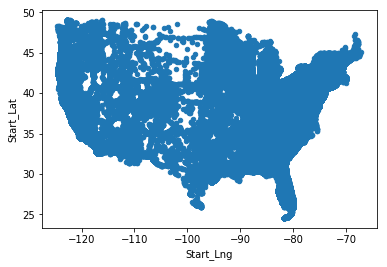

In [6]:
# For fun plot Start_Lng / Start_Lat
df_data.plot.scatter(x="Start_Lng", y="Start_Lat")
# No surprises, US roads map

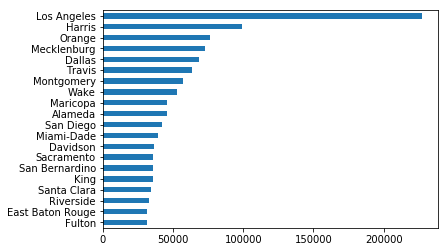

In [7]:
# Which County as the most recorded accidents only top 20
NBR_COUNTY = len(df_data['County'].unique()) # How many County
df_data['County'].value_counts(ascending=True)[NBR_COUNTY-20:].plot(kind='barh')

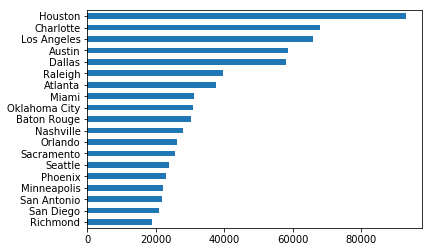

In [8]:
# Which City as the most recorded accidents only top 20
NBR_CITY = len(df_data['City'].unique()) # How many City
df_data['City'].value_counts(ascending=True)[NBR_CITY-20:].plot(kind='barh')

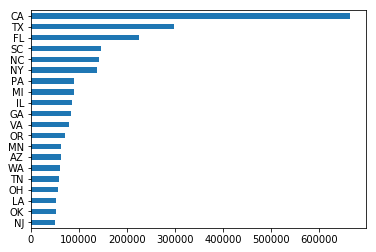

In [9]:
# Which State as the most recorded accidents only top 20
NBR_STATE = len(df_data['State'].unique()) # How many State
df_data['State'].value_counts(ascending=True)[NBR_STATE-20:].plot(kind='barh')                

These graphs show us where are the most recording accidents.

But we can go further by computing the number of inhabitant and registred drivers.

## With demographic data

In [10]:
df_code

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [11]:
# creation of a dataframe to old the values
df_statByPop = df_code.drop(["Abbrev"], axis=1)
df_statByPop["AccidentsNumber"] = 0
df_statByPop["population"] = 0

for Code in df_statByPop["Code"]:
    nbrAccident = df_data.loc[df_data["State"] == Code].shape[0]
    df_statByPop["AccidentsNumber"].loc[df_statByPop["Code"] == Code] = nbrAccident
    
for State in df_statByPop["State"]:
    habitants = df_pop["POPESTIMATE2019"].loc[df_pop["NAME"] == State].values
    df_statByPop["population"].loc[df_statByPop["State"] == State] = habitants
    
df_statByPop["Percentage"] = df_statByPop["AccidentsNumber"] / df_statByPop["population"]
df_statByPop["Percentage"] = df_statByPop["Percentage"] * 100
df_statByPop = df_statByPop.sort_values(by=["Percentage"])
df_statByPop = df_statByPop.reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
df_statByPop

,State,Code,AccidentsNumber,population,Percentage
0,Alaska,AK,0,731545,0.000000
1,Hawaii,HI,0,1415872,0.000000
2,North Dakota,ND,43,762062,0.005643
3,South Dakota,SD,60,884659,0.006782
4,Montana,MT,504,1068778,0.047157
5,Arkansas,AR,1749,3017804,0.057956
6,Wyoming,WY,492,578759,0.085009
7,Vermont,VT,585,623989,0.093752
8,Idaho,ID,1757,1787065,0.098318
9,West Virginia,WV,2274,1792147,0.126887


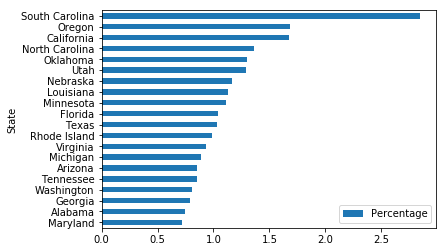

In [13]:
# top 20
df_statByPop[-20:].plot.barh(x='State', y='Percentage')

## Going further compute with number of driver's licences

In [14]:
# adding value to existing df
df_statByPop["drivers"] = 0
df_statByPop["PercentageDrivers"] = 0
    
for State in df_statByPop["State"]:
    drivers = df_drivers["Number of licensed drivers1"].loc[df_drivers["State"] == State].values
    df_statByPop["drivers"].loc[df_statByPop["State"] == State] = drivers
    
df_statByPop["PercentageDrivers"] = df_statByPop["AccidentsNumber"] / df_statByPop["drivers"]
df_statByPop["PercentageDrivers"] = df_statByPop["PercentageDrivers"] * 100
df_statByPop = df_statByPop.sort_values(by=["PercentageDrivers"])
df_statByPop = df_statByPop.reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
df_statByPop

,State,Code,AccidentsNumber,population,Percentage,drivers,PercentageDrivers
0,Alaska,AK,0,731545,0.000000,528873,0.000000
1,Hawaii,HI,0,1415872,0.000000,915033,0.000000
2,North Dakota,ND,43,762062,0.005643,513838,0.008368
3,South Dakota,SD,60,884659,0.006782,603643,0.009940
4,Montana,MT,504,1068778,0.047157,766716,0.065735
5,Arkansas,AR,1749,3017804,0.057956,2097201,0.083397
6,Vermont,VT,585,623989,0.093752,543057,0.107723
7,Wyoming,WY,492,578759,0.085009,421473,0.116733
8,Idaho,ID,1757,1787065,0.098318,1111485,0.158077
9,West Virginia,WV,2274,1792147,0.126887,1177136,0.193181


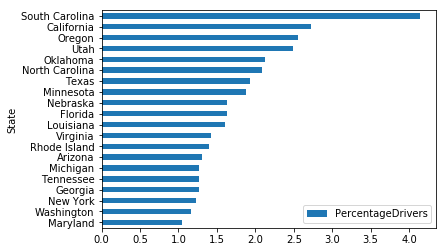

In [16]:
# top 20
df_statByPop[-20:].plot.barh(x='State', y='PercentageDrivers')

## Going further compute with Severity
I choose to multiply each accident by it Serverity and redo all the calculation

In [17]:
df_data["Severity"].value_counts()

2    1993410
3     887620
4      92337
1        968
Name: Severity, dtype: int64

In [18]:
# creation of a dataframe to old the values
df_statBySev = df_code.drop(["Abbrev"], axis=1)
df_statBySev["AccidentsNumberXSev"] = 0
df_statBySev["population"] = 0
df_statBySev["drivers"] = 0

for Code in df_statBySev["Code"]:
    nbrAccident = df_data.loc[(df_data["State"] == Code) & (df_data["Severity"] == 1)].shape[0]
    nbrAccident += (df_data.loc[(df_data["State"] == Code) & (df_data["Severity"] == 2)].shape[0] * 2)
    nbrAccident += (df_data.loc[(df_data["State"] == Code) & (df_data["Severity"] == 3)].shape[0] * 3)
    nbrAccident += (df_data.loc[(df_data["State"] == Code) & (df_data["Severity"] == 4)].shape[0] * 4)
    df_statBySev["AccidentsNumberXSev"].loc[df_statBySev["Code"] == Code] = nbrAccident
    
for State in df_statBySev["State"]:
    habitants = df_pop["POPESTIMATE2019"].loc[df_pop["NAME"] == State].values
    df_statBySev["population"].loc[df_statBySev["State"] == State] = habitants
    
for State in df_statBySev["State"]:
    drivers = df_drivers["Number of licensed drivers1"].loc[df_drivers["State"] == State].values
    df_statBySev["drivers"].loc[df_statBySev["State"] == State] = drivers

df_statBySev["AccidentPopSev"] = df_statBySev["AccidentsNumberXSev"] / df_statBySev["population"]
df_statBySev["AccidentPopSev"] = df_statBySev["AccidentPopSev"] * 100
df_statBySev["AccidentDriversSev"] = df_statBySev["AccidentsNumberXSev"] / df_statBySev["drivers"]
df_statBySev["AccidentDriversSev"] = df_statBySev["AccidentDriversSev"] * 100
df_statBySev = df_statBySev.sort_values(by=["AccidentDriversSev"])
df_statBySev = df_statBySev.reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
df_statBySev

,State,Code,AccidentsNumberXSev,population,drivers,AccidentPopSev,AccidentDriversSev
0,Hawaii,HI,0,1415872,915033,0.000000,0.000000
1,Alaska,AK,0,731545,528873,0.000000,0.000000
2,North Dakota,ND,119,762062,513838,0.015616,0.023159
3,South Dakota,SD,198,884659,603643,0.022382,0.032801
4,Montana,MT,1355,1068778,766716,0.126780,0.176728
5,Arkansas,AR,4837,3017804,2097201,0.160282,0.230641
6,Vermont,VT,1398,623989,543057,0.224042,0.257432
7,Wyoming,WY,1534,578759,421473,0.265050,0.363962
8,Idaho,ID,4093,1787065,1111485,0.229035,0.368246
9,Maine,ME,4391,1344212,1011385,0.326660,0.434157


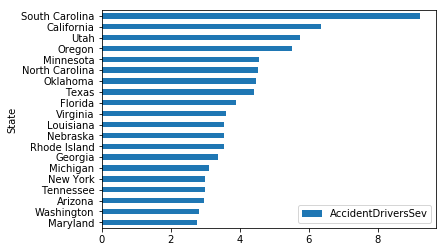

In [20]:
# top 20
df_statBySev[-20:].plot.barh(x='State', y='AccidentDriversSev')

<a id="Part2-c"></a>
# Conclusion

From our data we can say that :

* South Carolina have the most accidents comparing to the population and the number of driver's licence.
* Oklahoma have a lot of accident, but it seems to be less worst accident than in California, Utah, Oregon, Minnesota and Nort Carolina compare to the number of driver's licence.

<a id="Part3"></a>
# Part 3 : Data processing
Goal : Predicting Severity trough Machine Learning techniques
## Dealing with missing values

In [21]:
# finding pourcentage of missing value
df_data.isna().sum().div(df_data.shape[0]/100) # little trick to obtain directly the pourcentage

ID                        0.000000
Source                    0.000000
TMC                      24.478446
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  75.521554
End_Lng                  75.521554
Distance(mi)              0.000000
Description               0.000034
Number                   64.471722
Street                    0.000000
Side                      0.000000
City                      0.002791
County                    0.000000
State                     0.000000
Zipcode                   0.029586
Country                   0.000000
Timezone                  0.106343
Airport_Code              0.191337
Weather_Timestamp         1.234057
Temperature(F)            1.884892
Wind_Chill(F)            62.286965
Humidity(%)               1.989453
Pressure(in)              1.618580
Visibility(mi)            2.208595
Wind_Direction      

We can see :
    * Full columns
        ID
        Source
        Severity
        Start_Time
        End_Time
        Start_Lat
        Start_Lng
        Distance(mi)
        Street
        Side
        County
        State
        Country
        Amenity
        Bump
        Crossing
        Give_Way
        Junction
        No_Exit
        Railway
        Roundabout
        Station
        Stop
        Traffic_Calming
        Traffic_Signal
        Turning_Loop

    * Missing data points
        TMC
        Description
        City
        Zipcode
        Timezone
        Airport_Code
        Weather_Timestamp
        Temperature(F)
        Humidity(%)
        Pressure(in)
        Visibility(mi)
        Wind_Direction
        Wind_Speed(mph)
        Weather_Condition
        Sunrise_Sunset
        Civil_Twilight
        Nautical_Twilight
        Astronomical_Twilight

    * Few data points
        End_Lat
        End_Lng
        Number
        Wind_Chill(F)
        Precipitation(in)
        
For more description of the data, see kaggle page : https://www.kaggle.com/sobhanmoosavi/us-accidents

I choose to remove the column with few data then remove the row with missing data.

I also remove Source (Indicates source of the accident report (i.e. the API which reported the accident.), Description (Shows natural language description of the accident) and Country (Shows the county in address field ; Only US).

In [22]:
COL_REMOVE = ["Source",
              "Description",
              "Country",
              "End_Lat",
              "End_Lng",
              "Number",
              "Wind_Chill(F)",
              "Precipitation(in)"]

df_data = df_data.drop(COL_REMOVE, axis=1) # remove columns
df_data = df_data.dropna() # remove rows with missing values

In [23]:
print("From now on i've " + str(df_data.shape[0]) + " Accidents")

From now on i've 1886979 Accidents


## Dealing with non numerical values

In [24]:
# Compute some stats of the remaining columns
df_data.describe()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,1.886979e+06,1.886979e+06,1.886979e+06,1.886979e+06,1.886979e+06,1.886979e+06,1.886979e+06,1.886979e+06,1.886979e+06,1.886979e+06
mean,2.078186e+02,2.344567e+00,3.616444e+01,-9.350403e+01,1.820861e-01,6.337194e+01,6.493422e+01,2.982727e+01,9.185441e+00,8.283209e+00
std,2.027613e+01,4.809909e-01,4.926384e+00,1.619429e+01,1.466966e+00,1.880943e+01,2.211364e+01,6.737069e-01,2.723881e+00,5.070181e+00
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,0.000000e+00,-2.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.299583e+01,-1.050597e+02,0.000000e+00,5.180000e+01,4.900000e+01,2.980000e+01,1.000000e+01,4.600000e+00
50%,2.010000e+02,2.000000e+00,3.549314e+01,-8.791494e+01,0.000000e+00,6.600000e+01,6.700000e+01,2.997000e+01,1.000000e+01,7.000000e+00
75%,2.010000e+02,3.000000e+00,4.010566e+01,-8.085629e+01,0.000000e+00,7.700000e+01,8.400000e+01,3.010000e+01,1.000000e+01,1.040000e+01
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.783974e+01,2.544000e+02,1.670000e+02,1.000000e+02,3.115000e+01,1.110000e+02,8.228000e+02


It can only compute numerical values not text. So I create artifical values to remplaces them

First I checked which column to transform

In [25]:
df_data.dtypes

ID                        object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway   

The bool will be easy, for the rest I've to check the kind of values.

Except :
    * ID : Unique for each
    * Start_Time
    * End_Time
    * Weather_Timestamp

In [26]:
for col in df_data.columns:
    if df_data[col].dtypes == "object" and col not in ["ID", "Start_Time", "End_Time", "Weather_Timestamp"]:
        print(col)
        print(df_data[col].value_counts())
        print(20*"-")
        print(20*"-")
        print(20*"-")

Street
I-95 N                       17009
I-95 S                       14566
I-5 N                        14522
I-10 E                       11217
I-10 W                       10653
I-405 N                       9630
I-80 W                        9098
I-75 N                        8422
I-75 S                        7843
I-80 E                        7820
I-5 S                         7291
US-101 N                      6696
I-15 N                        5785
San Diego Fwy S               5614
I-90 E                        5519
I-94 W                        5358
I-40 W                        4671
I-580 W                       4009
I-35 N                        3961
I-880 N                       3901
I-26 W                        3777
Main St                       3678
I-580 E                       3652
I-20 W                        3591
CA-99 N                       3560
I-65 S                        3491
I-85 N                        3473
I-4 E                         3471
I-680 S      

US/Eastern     865873
US/Central     527376
US/Pacific     402262
US/Mountain     91468
Name: Timezone, dtype: int64
--------------------
--------------------
--------------------
Airport_Code
KMCJ    41020
KRDU    38848
KCLT    35415
KATT    33784
KBNA    30441
KBTR    28560
KDAL    24893
KFNT    23961
KCQT    17031
KLGA    16473
KORL    15835
KBFI    15798
KPWA    15325
KHPN    14030
KEMT    13711
KHHR    13648
KDPA    13533
KROC    13497
KAUS    13078
KOAK    12871
KCCR    12583
KLOM    12574
KFUL    12446
KATL    12149
KDET    11897
KPHX    11847
KSNA    11504
KGMU    11495
KGRR    11109
KOKC    11058
        ...  
KE80        1
KABH        1
KJKL        1
KESC        1
KEGV        1
KTMH        1
KGUY        1
KACP        1
KHDN        1
KHSE        1
KGTR        1
KGFK        1
KFOZ        1
KACK        1
KRIM        1
KELO        1
KCBK        1
KBYI        1
KBHK        1
KAQV        1
KHRO        1
KRWV        1
KARV        1
KPOE        1
KMHE        1
KATS        1
KCVS     

### Boolean values
First I go with the easy ones : bool values (0 : false, 1 : true)

In [27]:
BOOL_COL = ["Amenity",
            "Bump",
            "Crossing",
            "Give_Way",
            "Junction",
            "No_Exit",
            "Railway",
            "Roundabout",
            "Station",
            "Stop",
            "Traffic_Calming",
            "Traffic_Signal",
            "Turning_Loop"]

# going through all values to remplace them
for col in BOOL_COL:
    df_data[col].loc[df_data[col] == True] = 1
    df_data[col].loc[df_data[col] == False] = 0    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Day/Night values
Some columns only have two options, I used the same trick than before

I chosse : 1 for Day and 0 for Night.

In [28]:
COL_DAYNIGHT = ["Sunrise_Sunset",
                "Civil_Twilight",
                "Nautical_Twilight",
                "Astronomical_Twilight"]

# going through all values to remplace them
for col in COL_DAYNIGHT:
    df_data[col].loc[df_data[col] == "Day"] = 1
    df_data[col].loc[df_data[col] == "Night"] = 0  

In [29]:
df_data["Sunrise_Sunset"].value_counts()

1    1449471
0     437508
Name: Sunrise_Sunset, dtype: int64

In [30]:
df_data["Street"].value_counts()

I-95 N                       17009
I-95 S                       14566
I-5 N                        14522
I-10 E                       11217
I-10 W                       10653
I-405 N                       9630
I-80 W                        9098
I-75 N                        8422
I-75 S                        7843
I-80 E                        7820
I-5 S                         7291
US-101 N                      6696
I-15 N                        5785
San Diego Fwy S               5614
I-90 E                        5519
I-94 W                        5358
I-40 W                        4671
I-580 W                       4009
I-35 N                        3961
I-880 N                       3901
I-26 W                        3777
Main St                       3678
I-580 E                       3652
I-20 W                        3591
CA-99 N                       3560
I-65 S                        3491
I-85 N                        3473
I-4 E                         3471
I-680 S             

In [31]:
df_data.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,A-3,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,100.0,29.67,10.0,SW,3.5,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,A-4,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,R,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,A-5,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
5,A-6,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Westerville Rd,R,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
6,A-7,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,N Woodward Ave,R,Dayton,Montgomery,OH,45417-2476,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1


# TO DO : COMPUTE OTHER CATEGORICAL VALUES